### Bays Theorem Denomstration Validating a lie detector

How accurate a lie detector is.
This question is examined many times while explaining application of Bayes Theorem and it gets little tricky quite soon. Let me try to simplify the scenario in plain english and then try to answer some questions in plain english but not without examining with some experiments. You can skip to the conclusions part if you are not interested in technical details. 

Scenario.
Letss assume that you invented a Lie Detector which works as follows. if detects liars in 90% of scenarios. It also falsely labels 20% truth Speakers as liars.
Here is how a typical question answer session between skeptical about lie detector and an honest inventor goes:
Q: how reliable the Lie Detector is.
A: it Depends. 
Q: Depends on what ? 
A: Depends on what is the population of lying people in the society where lie detector is applied.
Q: What the population has to do your lie detector's performance ? 
A: Everything. 
Q: How ? 
A: I am going to prove it.

Now this is where Baye's theorem comes into the picture. In the following section I am going to apply that diverse population to show how the lie detector reliability changes.

### Reliability Measures 

So we start our quest with more fundamental question. What is the reliability of the lie detector means? 
We make it concrete by asking another question. Lets say we went to town and randomly selected one person and our lie detector tested him positive and labeled as a liar. How certain we are that the person is really a liar ?

Now for argument's sake lets assume that number of liars determine the applicability of lie detector for that popluation.Here are following questions around that which we'll try to answer in the analysis that follows:

1) What is the relation between population lie detection and reliability of test results.
2) How the change in lie detector quality( 90% true positive and 20% False negative) going to impact the reliability.
3) How The lie detector perform in extreme scenarios where we have all liars or all Tuth speakers.

We'll try to analyse these questions and answer them based on the analysis in conclusion section.


### Theoratical Background

Let P(E) be probability of event E and P(H) be probability of event H. Probability P(E|H) is said to be probability of event E given event H. Similarly probability P(H|E) is said to be probability of event H given that event E. 

Following is the relation between these probabilities according to Baye's theorem. 

$$
P(E|H) = P(H|E)*P(E)/P(H)
$$


We can fit our lie detector probabilities as follows. 

P(E) = probaility of someone being a liar. 
P(H) = probability of a machine detecting a liar.

Now lets say we have a person whom we know definitely is a liar now what is the chance that upon testing using lie detector the person is cought as liar. As per the machine specification the chance are 90% or .9. 
therefore P(H|E) = .9.

There is another person who is detected liar using lie detector. What is the probability that the person is actually liar. It can not be .9 since there are chances that this person speaks truth and machine made a error which it does as per the machine specifications in 20% cases. So need to find the true value. 

P(E|H) = ??

Now we need two more quantities. Probability of someone being a liar without lie detector. This quantity depends on the total liars in the population which is given as .1. Since 10% people are liar as we know. 

P(E) = .1


Now what is the probability of a machine detecting a liar. This quantity is dependent on total liars detected by machine and out of those total actual liars. This quantity calculated as following :
  probability of liar is detected correctly * probability actual liars + probability of detecting a liar incorrectly * probability of truth speakers
  
   .9*.1+.2*.9 = .09+.18=.27
   
   P(H) = .27 
   
   This is the quantity that is harder to calculate and it also depends on how falsely the machine identifies a truth speaker as liar.
   
   lets apply Bayes theorem 
   
$$
 P(E|H) = P(H|E)*P(E)/P(H)  
 P(E|H) = .9*.1/.27 
 = 1/3= 33.34%
$$


  
  


### Experiment Setup 

As we can see the probability is dependent of the population probability. We can now experiment with different populations of liars and see how the lie detector will perform. In the following script we 'll select 1000 samples of population with each sample having 0 to 1 equally spaced probabilities of liars and see for each percentage how the lie detector will perform. 

We are writing two python functions one to calculate probability and other to plot the results 

In [90]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [91]:
p_detection_lie = .9
p_error_on_true = .2
population_lie = .1 

In [97]:
def liar_probabily_aftter_detection(p_detection_lie,p_error_on_true,population_lie):
    total_liar_detected = p_detection_lie*population_lie+p_error_on_true*(1-population_lie)
    correct_liar_detected = p_detection_lie*population_lie
    liar_given_detection = correct_liar_detected/total_liar_detected
    return liar_given_detection

def plot_results(num_samples,p_detection_lie,p_error_on_true):
    population_lies = np.linspace(0,1,num_samples)
    result = [(population_lie, true_probabily_aftter_detection(p_detection_lie,p_error_on_true,population_lie) ) 
              for population_lie in population_lies]

    df = pd.DataFrame(result, columns =['population_lie', 'true_probabily_aftter_detection'])
    plt.plot(df['population_lie'], df['true_probabily_aftter_detection'], label='correct detection Probability')
    #plt.plot(df['population_lie'], df['true_probabily_aftter_detection'], label='Detected Probability')
    plt.xlabel('population_lie')
    plt.ylabel('true_probabily_aftter_detection')



    plt.legend()
    plt.show()
    #return df
    

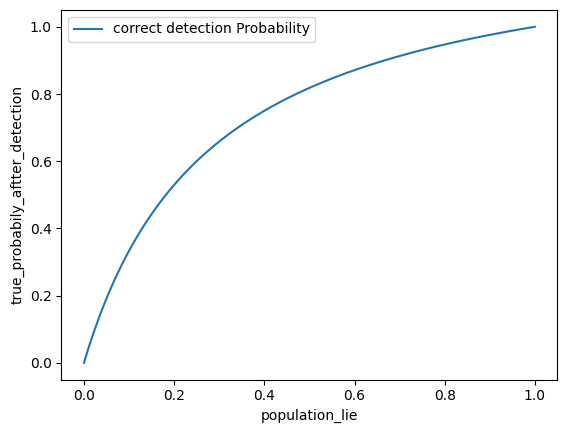

In [98]:
plot_results(1000,.9, .2)

As we can see from above the accuracy of lie detector increases as population of liars in actual population increases. 

Now lets plot two special cases one where everyone in population tells lies and in another where no one does. 

In [99]:
liar_probabily_aftter_detection(.9,.2, 0)

0.0

In [100]:
liar_probabily_aftter_detection(.9,.2, 1)

1.0

Lets consider another case where machine never identifies a truth speaker as liar 

/var/folders/mk/pkqnv_dx053g95zwc3mj01b00000gn/T/ipykernel_79707/1488587400.py:4: RuntimeWarning: invalid value encountered in double_scalars
  liar_given_detection = correct_liar_detected/total_liar_detected


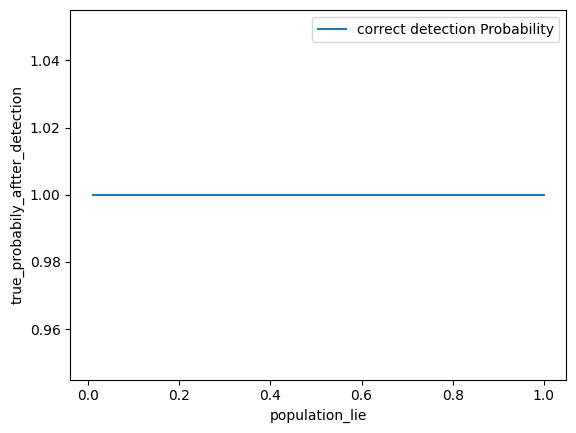

In [101]:
plot_results(100,.9, 0)

As we can see if machine never fives a false positive then its results are always reliable if it identifies someone as liar. It might incorrectly identify some

### Conclusion 

As we can see here 


### References 